<a href="https://colab.research.google.com/github/arthurqueiroz4/so-simulation/blob/main/SO_Trabalho_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime, timedelta
from time import sleep

class Process:
  def __init__(self, id, burst_time):
    self.id = id
    self.burst_time = burst_time
    self.remainder_time = burst_time
    self.init_time = datetime.now()
    self.wait_times = []
    self.start = datetime.now()
    self.return_time = 0

  def execute(self, quantum):
    self.wait_times.append(datetime.now() - self.init_time)
    if quantum > self.remainder_time:
      sleep(self.remainder_time/1000)
    else:
      sleep(quantum/1000)
    self.remainder_time -= quantum
    self.init_time = datetime.now()
    return True if self.remainder_time <= 0 else False

  def get_wait_time(self):
    return sum(self.wait_times, timedelta(0, 0))

  def __str__(self):
    return f"Process [{self.id}] Tempo restante: {self.remainder_time}"

class RoundRobin:
  def __init__(self, process, quantum):
    self.process = process
    self.concludeds = []
    self.count = 0
    self.quantum = quantum
    self.throughput = len(process)

  def schedule(self):
    while len(self.process):
      p = self.next()
      if (p.execute(self.quantum)):
        self.move_process_to_concluded()

  def next(self) -> Process:
    self.count = (self.count + 1) % len(self.process)
    sleep(1/1000)
    return self.process[self.count]

  def move_process_to_concluded(self):
    p = self.process.pop(self.count)
    p.return_time = datetime.now() - p.start
    self.concludeds.append(p)

  def print_process(self):
    [print(p) for p in self.process]


In [ ]:
class Metrics:

  def __init__(self, process_concludeds, throughput_time):
    self.throughput_time = throughput_time
    self.process_concludeds = process_concludeds[:]

  def return_time_avg(self):
    return self.__avg([p.return_time for p in self.process_concludeds])

  def wait_time_avg(self):
    return self.__avg([p.get_wait_time() for p in self.process_concludeds])

  def throughput(self):
    return sum(1 for p in self.process_concludeds if p.return_time <= self.throughput_time)

  def __avg(self, elements):
    return sum(elements, timedelta(0, 0)) / len(elements)


In [ ]:
from random import randint

class Simulation:
  def __init__(self, max_burst_time, num_process, throughtput_ms):
    self.throughput_time = timedelta(milliseconds=throughtput_ms)
    self.max_burst_time = max_burst_time
    self.burst_times = []
    self.num_process = num_process
    self.__create_burst_times()

  def __create_burst_times(self):
    for i in range(0, self.num_process):
      self.burst_times.append(randint(0, self.max_burst_time))

  def generate_process(self):
    process = []
    for i in range(self.num_process):
      process.append(Process(i, self.burst_times[i]))
    return process

  def start(self, quantum):
    rb = RoundRobin(self.generate_process(), quantum)
    rb.schedule()
    return rb


In [ ]:
from random import randint

simulation = Simulation(max_burst_time=100, num_process=100, throughtput_ms=1400)

metrics_by_quantum = {}

for quantum in range(5, 101, 5):
    print(f"Simulando com quantum = {quantum}")
    rb = simulation.start(quantum)
    metrics_by_quantum[quantum] = Metrics(rb.concludeds, simulation.throughput_time)


Simulando com quantum = 5
Simulando com quantum = 10
Simulando com quantum = 15
Simulando com quantum = 20
Simulando com quantum = 25
Simulando com quantum = 30
Simulando com quantum = 35
Simulando com quantum = 40
Simulando com quantum = 45
Simulando com quantum = 50
Simulando com quantum = 55
Simulando com quantum = 60
Simulando com quantum = 65
Simulando com quantum = 70
Simulando com quantum = 75
Simulando com quantum = 80
Simulando com quantum = 85
Simulando com quantum = 90
Simulando com quantum = 95
Simulando com quantum = 100


In [ ]:
!pip install matplotlib

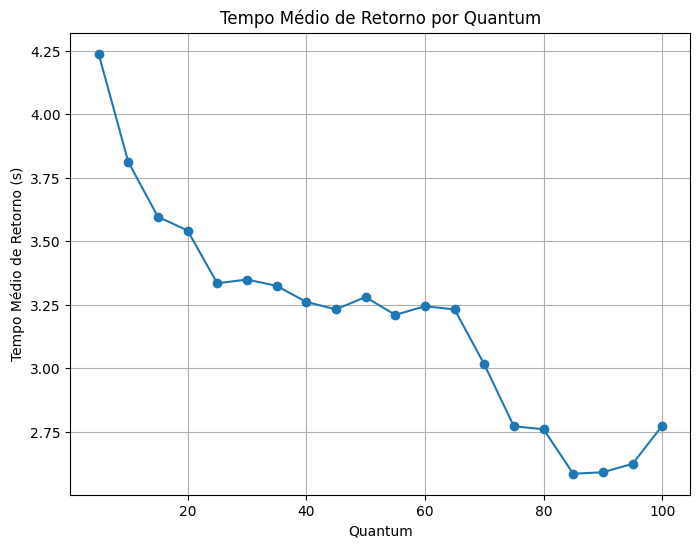

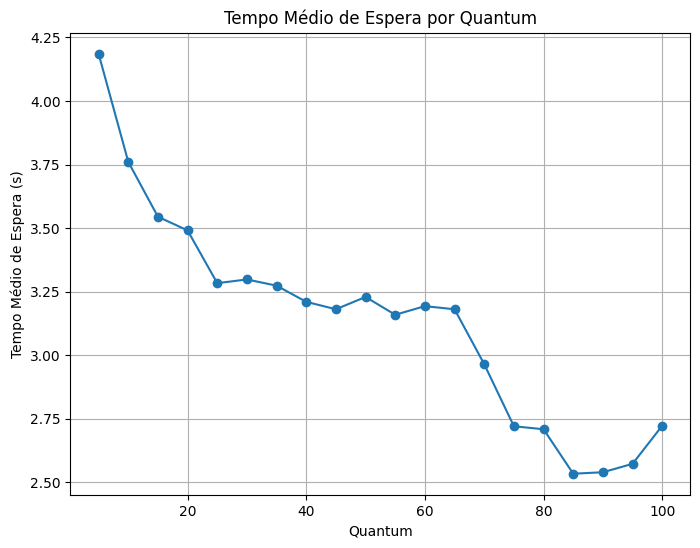

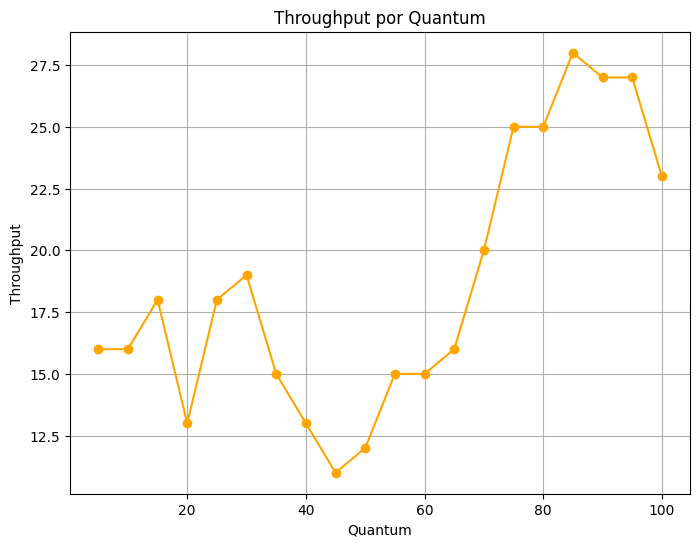

In [ ]:
import matplotlib.pyplot as plt

# Listas para armazenar os resultados
quantums = []
return_time_avgs = []
wait_time_avgs = []
throughputs = []

# Preenchendo as listas com os resultados
for quantum, metrics in metrics_by_quantum.items():
    quantums.append(quantum)
    return_time_avgs.append(metrics.return_time_avg().total_seconds())
    wait_time_avgs.append(metrics.wait_time_avg().total_seconds())
    throughputs.append(metrics.throughput())

# Gráfico do Tempo Médio de Retorno
plt.figure(figsize=(8, 6))
plt.plot(quantums, return_time_avgs, marker='o')
plt.title('Tempo Médio de Retorno por Quantum')
plt.xlabel('Quantum')
plt.ylabel('Tempo Médio de Retorno (s)')
plt.grid(True)
plt.savefig('tempo_medio_retorno.png')
plt.show()

# Gráfico do Tempo Médio de Espera
plt.figure(figsize=(8, 6))
plt.plot(quantums, wait_time_avgs, marker='o')
plt.title('Tempo Médio de Espera por Quantum')
plt.xlabel('Quantum')
plt.ylabel('Tempo Médio de Espera (s)')
plt.grid(True)
plt.savefig('tempo_medio_espera.png')
plt.show()

# Gráfico do Throughput
plt.figure(figsize=(8, 6))
plt.plot(quantums, throughputs, marker='o', color='orange')
plt.title('Throughput por Quantum')
plt.xlabel('Quantum')
plt.ylabel('Throughput')
plt.grid(True)
plt.savefig('throughput.png')
plt.show()
